# Marketing Analytics
by Kuanchieh Peng

## Problem Statement
I am a marketing data analyst and I've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. I need to analyze datasets to understand this problem and propose data-driven solutions.
## Background
I am a marketing data analyst and I've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. I need to analyze datasets to understand this problem and propose data-driven solutions.
## Dataset Overview
The data set ifood_df.csv consists of 2206 customers of XYZ company with data on customer profiles, product preferences, campaign successes/failures, and channel performance.
## Sources
Dataset is ifood_df.csv from https://github.com/nailson/ifood-data-business-analyst-test. I do not own this dataset.
## Brief
- Preprocessing
- EDA
- Statistical Analyses
- Visualizations
- CMO Recommendations

## Imports

In [57]:
# for preprocessing, EDA
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# for statistical analyses
import statsmodels.api as sm

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# for suppressing warnings
import warnings
warnings.simplefilter("ignore")

In [58]:
# data
df = pd.read_csv('ifood_df.csv')
df_cleaned = df.copy()

## Pipeline

In [59]:
class bold:
    start = '\033[1m'
    end   = '\033[0m'
    
def full_info(df):
    # Prints typically useful statistical information about given dataframe.
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")
    print("")
    print(bold.start, "Notable statistics of numeric features in this dataset:", bold.end)
    print("")
    print(df.describe())
    print("")
    print(bold.start, "Object type of features in this dataset:", bold.end)
    print("")
    df.info()
    
def short_info(df):
    # Prints selected useful statistical information about given dataframe.
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")

## Preprocessing

In [60]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [61]:
df.shape

(2205, 39)

In [62]:
full_info(df)

This dataframe consists of  39  columns and 2205  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  184  duplicate rows.

 Notable statistics of numeric features in this dataset: 

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.00

#### Assessment Report
- There are 184 duplicate rows.
- There are 0 null entries and data types are ideal(being int).

In [63]:
df_cleaned = df.drop_duplicates()

In [64]:
df_cleaned[df_cleaned.duplicated()].shape[0]

0

In [65]:
title = 'ifood_df_cleaned.csv'
df_cleaned.to_csv(title, index = False)
df = pd.read_csv(title)
del title

#### Checking Cleaned Dataframe

In [80]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [67]:
short_info(df)

This dataframe consists of  39  columns and 2021  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  0  duplicate rows.


## EDA

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3         

**Annotation on features**
- (Kid)home - number of kids in customer's household
- Recency - number of days since customer's last purchase
- Mnt(Wines) - amount spent on (wine) in the past two years
- Num(Deals)Purchases - number of purchases made with a discount
- Accepted(Cmp3) - 1 if customer accepted offer in third campaign, 0 otherwise
- Response - 1 if customer accepted offer during previous campaign, 0 otherwise
- Complain - 1 if customer had filed one or more complaints in the past two years, 0 otherwise 

#### Investigaing Outliers

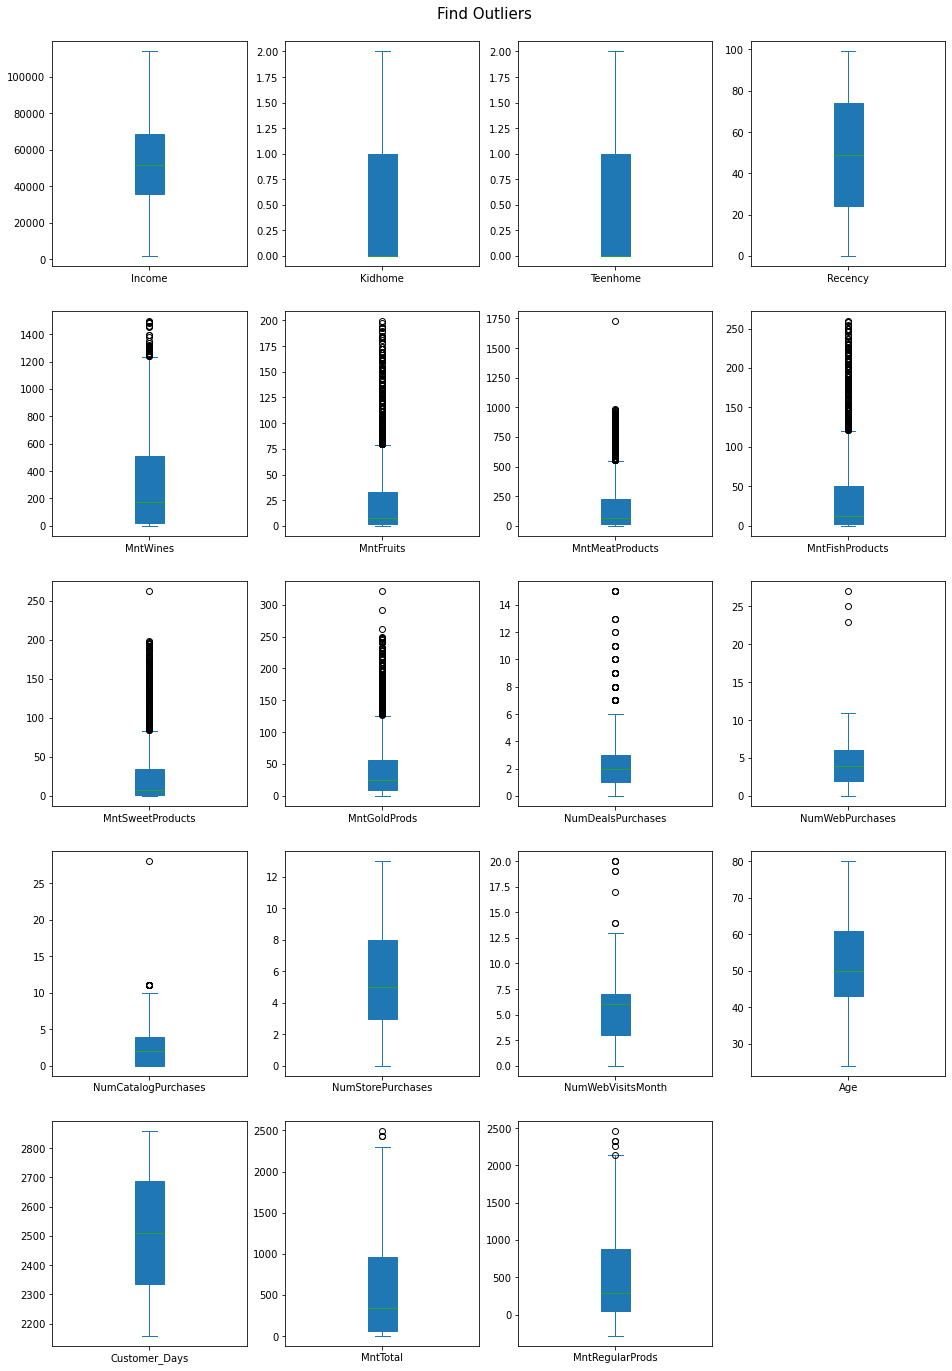

In [84]:
cols_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'AcceptedCmpOverall']
df_for_plot = df.drop(columns = cols_to_drop).select_dtypes(include = np.number)
del cols_to_drop
df_for_plot.plot(subplots = True, layout = (5, 4), kind = 'box', figsize = (16, 24), patch_artist = True)
plt.suptitle('Find Outliers', fontsize = 15, y = 0.9)
plt.savefig('feature boxplots.png', bbox_inches = 'tight')

There are many features with outliers, but the outliers make sense because of the features' nature.